In [113]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [114]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

In [115]:
from scipy.interpolate import splev

In [116]:
from copy import deepcopy

In [117]:
import sys
sys.path.append('../')

In [118]:
import newcomb_simple as new
import equil_solver as es
reload(es)

<module 'equil_solver' from '../equil_solver.pyc'>

In [119]:
profile = es.UnitlessExponentialDecaySkin()

In [120]:
from scipy.interpolate import PiecewisePolynomial

In [121]:
skin = PiecewisePolynomial([0.6, 0.8, 1.], [[0.48675225596, -1.1682054143], [1.6869800046, 0], [0, 0]])

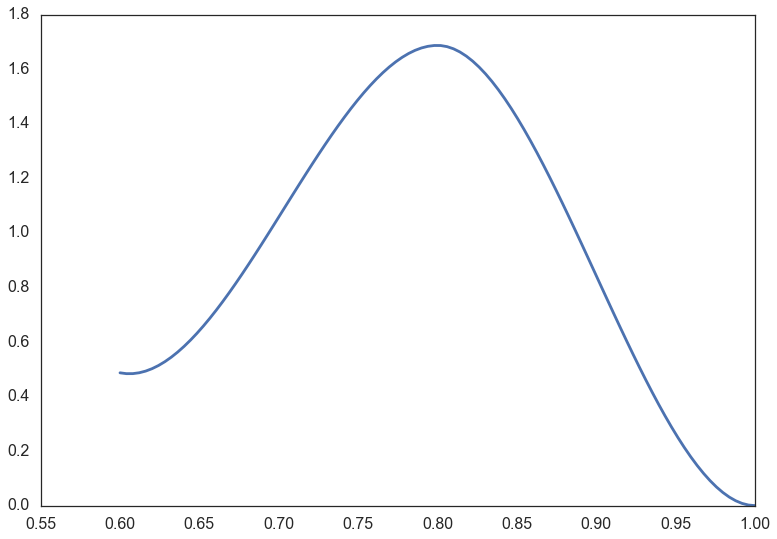

In [122]:
r = np.linspace(0.6, 1, 100) 
plt.plot(r, skin(r))

In [123]:
splines = profile.get_tck_splines()

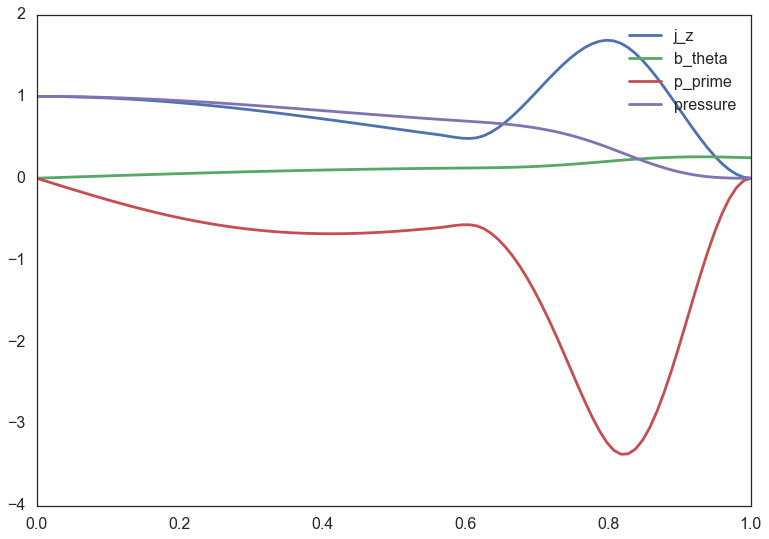

In [124]:
r = np.linspace(0, 1, 100)
plt.plot(r, splev(r, splines['j_z']), label='j_z')
plt.plot(r, splev(r, splines['b_theta']), label='b_theta')
plt.plot(r, splev(r, splines['p_prime']), label='p_prime')
plt.plot(r, splev(r, splines['pressure']), label='pressure')
plt.legend()

In [128]:
#parameters
k_bar = 1.5
lambda_bar = 0.010
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-2
max_step = 1e-2
nsteps = 1e3
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 20}

In [129]:
#create profile and determine external stability
profile = es.UnitlessExponentialDecaySkin(**profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'points_core': profile.points_core,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)

In [130]:
results

(True,
 True,
 13.383454080252012,
 None,
 array([ 1.        ,  0.99997739,  0.9999247 ,  0.99984206,  0.99972963,
         0.99958744,  0.99941562,  0.99921438,  0.99898392,  0.99872449,
         0.99843637,  0.99811986,  0.9977753 ,  0.99740305,  0.9970035 ,
         0.99657707,  0.99612423,  0.99564544,  0.9951412 ,  0.99461205,
         0.99405854,  0.99348123,  0.99288074,  0.99225769,  0.99161272,
         0.9909465 ,  0.99025971,  0.98955306,  0.98882726,  0.98808306,
         0.9873212 ,  0.98654246,  0.98574762,  0.98493747,  0.98411283,
         0.98327452,  0.98242335,  0.98156018,  0.98068585,  0.97980121,
         0.97890712,  0.97800445,  0.97709408,  0.97617687,  0.9752537 ,
         0.97432546,  0.97339302,  0.97245726,  0.97151906,  0.9705793 ,
         0.96963885,  0.96869859,  0.96775939,  0.96682211,  0.96588761,
         0.96495674,  0.96403036,  0.96310929,  0.96219438,  0.96128645,
         0.96038631,  0.95949477,  0.95861263,  0.95774067,  0.95687967,
         

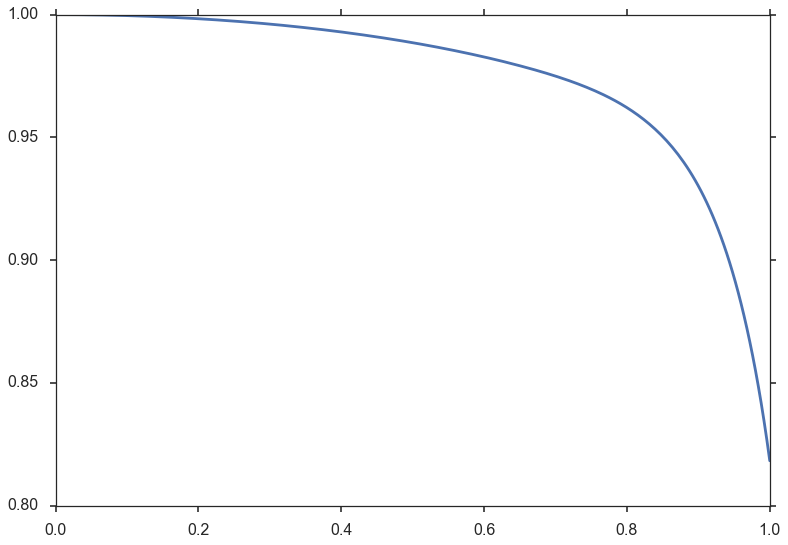

In [111]:
plt.plot(results[-1], results[-3])

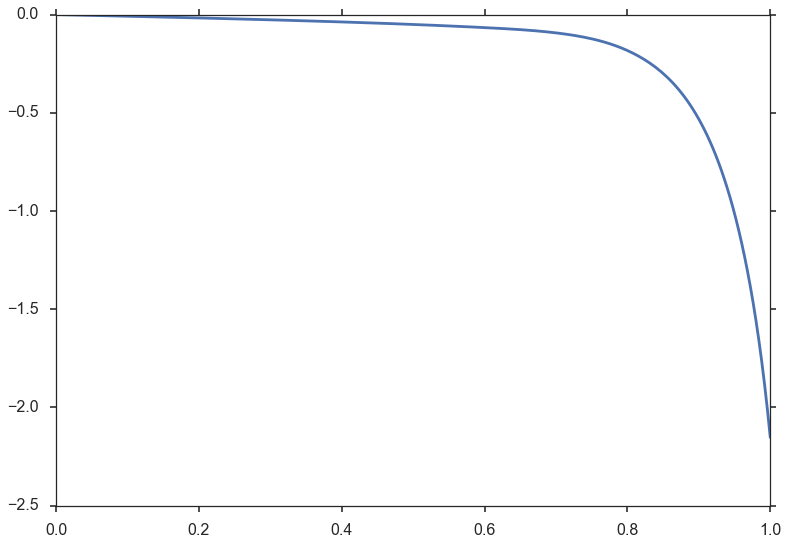

In [112]:
plt.plot(results[-1], results[-2])